In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.sparse
import scipy.linalg
from scipy.stats import ortho_group
import sys

In [2]:
import time

## *Задача 1* 


Реализовать с помощью scipy генератор полосатых матриц, который должен поддерживать функции:
* Генерация абсолютно случайной полосатой матрицы $n\times m$
* Генерация полосатой матрицы с постоянными коэффициентами вдоль каждой полосы $n\times n$
* Генерация случайного возмущения матрицы $n\times m$, каждый элемент которой не превосходит по модулю заданный $\varepsilon$
* Генерация полосатой матрицы, в которой полосы заданы векторами.

 Сравнить три приведённых ниже метода создания матриц между собой по использованию памяти, используя измерение размера объектов в Python (sys.getsizeof(object[, default])). 
 Реализовать генератор матриц всеми тремя методами, сравнить их также по скорости (для решения систем уравнений).




In [ ]:
N = 10
m = 3
Ap, As, An, Aw, Ae = np.ones(N), np.ones(N), np.ones(N), np.ones(N), np.ones(N)
diagonals = [Ap, As, An, Aw, Ae]
A = scipy.sparse.diags(diagonals, [0, -1, 1, -m, m]).toarray()
x = scipy.linalg.solve(A, b)
print(A, x, sep = '\n')


In [ ]:
N = 10 
m = 3
Ap, As, An, Aw, Ae = np.ones(N), np.ones(N), np.ones(N), np.ones(N), np.ones(N)
A = np.zeros((2 * m + 1, N))
A[0] = Ae
A[m - 1] = An
A[m] = Ap
A[m + 1] = As
A[2 * m] = Aw
x = scipy.linalg.solve_banded((m, m), A, b)
print(A, x, sep = '\n')

In [ ]:
from scipy.sparse.linalg import spsolve
N = 10
m = 3
Ap, As, An, Aw, Ae = np.ones(N), np.ones(N), np.ones(N), np.ones(N), np.ones(N)
diagonals = [Ap, As, An, Aw, Ae]
A = scipy.sparse.diags(diagonals, [0, -1, 1, -m, m])
x = spsolve(A,b)

# убрали .toarray() - чтобы сохранить разреженную форму

# https://docs.scipy.org/doc/scipy/reference/sparse.linalg.html#module-scipy.sparse.linalg 

print(A, x, sep = '\n')

### Решение

In [11]:
def generate_rand_band_matrix(N, gen_type):
    """
    gen_type = 0 - diagonal with 3 diags, stored as full matrix
    gen_type = 1 - 3 rows, stored as full matrix
    gen_type = 2 - same as gen_type = 0 but stored as scipy sparce matrix
    """
    if gen_type == 0:
        d1 = np.random.uniform(-1, 1, size=N - 1)
        d2 = np.random.uniform(-1, 1, size=N)
        d3 = np.random.uniform(-1, 1, size=N - 1)
        diagonals = [d1, d2, d3]
        return scipy.sparse.diags(diagonals, [-1, 0, 1]).toarray()
    elif gen_type == 1:
        A = np.zeros([3, N])
        d1 = np.random.uniform(-1, 1, size=N)
        d2 = np.random.uniform(-1, 1, size=N)
        d3 = np.random.uniform(-1, 1, size=N)
        A[0] = d1
        A[1] = d2
        A[2] = d3
        return A
    else:
        d1 = np.random.uniform(-1, 1, size=N - 1)
        d2 = np.random.uniform(-1, 1, size=N)
        d3 = np.random.uniform(-1, 1, size=N - 1)
        diagonals = [d1, d2, d3]
        return scipy.sparse.diags(diagonals, [-1,0, 1])
    
def generate_const_band_matrix(N, A, B, C, gen_type):
    if gen_type == 0:
        d1 = A * np.ones(N-1)
        d2 = B * np.ones(N)
        d3 = C * np.ones(N-1)
        diagonals = [d1, d2, d3]
        return scipy.sparse.diags(diagonals, [-1, 0, 1]).toarray()
    elif gen_type == 1:
        A = np.zeros([N, N])
        d1 = A * np.ones(N)
        d2 = B * np.ones(N)
        d3 = C * np.ones(N)
        A[0] = d1
        A[int(N / 2)] = d2
        A[N - 1] = d3
        return A
    else:
        d1 = A * np.ones(N-1)
        d2 = B * np.ones(N)
        d3 = C * np.ones(N-1)
        diagonals = [d1, d2, d3]
        return scipy.sparse.diags(diagonals, [-1,0, 1])

def generate_eps_band_matrix(N, eps, gen_type):
    if gen_type == 0:
        d1 = np.random.uniform(-eps, eps, size=N - 1)
        d2 = np.random.uniform(-eps, eps, size=N)
        d3 = np.random.uniform(-eps, eps, size=N - 1)
        diagonals = [d1, d2, d3]
        return scipy.sparse.diags(diagonals, [-1, 0, 1]).toarray()
    elif gen_type == 1:
        A = np.zeros([N, N])
        d1 = np.random.uniform(-eps, eps, size=N)
        d2 = np.random.uniform(-eps, eps, size=N)
        d3 = np.random.uniform(-eps, eps, size=N)
        A[0] = d1
        A[int(N / 2)] = d2
        A[N - 1] = d3
        return A
    else:
        d1 = np.random.uniform(-eps, eps, size=N - 1)
        d2 = np.random.uniform(-eps, eps, size=N)
        d3 = np.random.uniform(-eps, eps, size=N - 1)
        diagonals = [d1, d2, d3]
        return scipy.sparse.diags(diagonals, [-1,0, 1])

def generate_band_matrix(N, d1, d2, d3, gen_type):
    if gen_type == 0:
        diagonals = [d1, d2, d3]
        return scipy.sparse.diags(diagonals, [-1, 0, 1]).toarray()
    elif gen_type == 1:
        A = np.zeros([N, N])
        A[0] = d1
        A[int(N / 2)] = d2
        A[N - 1] = d3
        return A
    else:
        diagonals = [d1, d2, d3]
        return scipy.sparse.diags(diagonals, [-1,0, 1])

In [15]:
A = generate_rand_band_matrix(5, 0)
print(A)
print(sys.getsizeof(A))

[[ 0.63046292 -0.4021231   0.          0.          0.        ]
 [ 0.56571976  0.5906609   0.19702568  0.          0.        ]
 [ 0.         -0.87563726 -0.8252582  -0.00732202  0.        ]
 [ 0.          0.          0.00489604  0.1971894   0.10306348]
 [ 0.          0.          0.         -0.53068016 -0.26968664]]
320


In [16]:
A = generate_rand_band_matrix(5, 1)
print(A)
print(sys.getsizeof(A))
# f = np.ones(5)
# scipy.linalg.solve_banded((1, 1), A, f)

[[-0.16500579  0.94496948  0.47101188  0.06988046 -0.80544313]
 [-0.48723907  0.09666779 -0.91726042 -0.58937257 -0.85181608]
 [ 0.16344873 -0.11740019 -0.5273542  -0.59621684 -0.19568203]]
240


In [17]:
A = generate_rand_band_matrix(5, 2)
print(A)
print(sys.getsizeof(A))

  (1, 0)	-0.5875252927705341
  (2, 1)	0.17391473337204233
  (3, 2)	0.6139215196865297
  (4, 3)	-0.7501688985755572
  (0, 0)	-0.5321579479625707
  (1, 1)	0.012127174584690259
  (2, 2)	0.7106295210753695
  (3, 3)	0.8001148112028285
  (4, 4)	0.5250438959074015
  (0, 1)	0.31727642215055374
  (1, 2)	-0.19625334628968738
  (2, 3)	0.3278829377670385
  (3, 4)	-0.3251699968081594
48


Как видно, поледний способ требует значительно меньше памяти

Исследуем, как зависит скорость решения систем с трехдиагональными матрицами методами solve, solve_banded, spsolve модуля scipy.linalg

/home/danyesss/anaconda3/envs/snakes/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


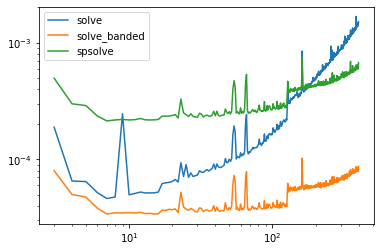

In [18]:
from scipy.sparse.linalg import spsolve
import scipy.sparse.linalg
times1 = []
times2 = []
times3 = []
N = 400
for i in range(3, N):
    avar_t1 = 0.0
    avar_t2 = 0.0
    avar_t3 = 0.0
    f = np.ones(i)
    for _ in range(100):
        A = generate_rand_band_matrix(i, 0)
        B = generate_rand_band_matrix(i, 2)
        C = generate_rand_band_matrix(i, 1)
        
        start = time.time()
        x = scipy.linalg.solve(A, f)
        end = time.time()
        avar_t1 += end - start  
        
        start = time.time()
        x = spsolve(B, f)
        end = time.time()
        avar_t3 += end - start  
        
        start = time.time()
        x = scipy.linalg.solve_banded((1, 1), C, f)
        end = time.time()
        avar_t2 += end - start 
    avar_t1 /= 100
    avar_t2 /= 100
    avar_t3 /= 100
    times1.append(avar_t1)
    times2.append(avar_t2)
    times3.append(avar_t3)
plt.plot(np.array(range(3, N)), times1, label='solve')
plt.plot(np.array(range(3, N)), times2, label='solve_banded')
plt.plot(np.array(range(3, N)), times3, label='spsolve')
plt.yscale('log')
plt.xscale('log')
plt.legend()

In [ ]:
#################

# Задача 2


В третьем методе из предыдущей задачи для повышения производительности можно использовать sparse.linalg.splu(A).solve(b) , который использует LU-декомпозицию, после чего объект SuperLU  имеет свой собственный метод solve.

Реализуйте генератор матриц из первого задания, используя этот метод. 
https://docs.scipy.org/doc/scipy/reference/sparse.linalg.html#module-scipy.sparse.linalg   

Убедитесь измерением времени работы, что он работает быстрее. Однако третий метод из предыдущей задачи считается самым предпочтительным. Найдите, в чём недостаток предложенного в этой задаче метода, и докажите его с помощью измерений.

Для измерений можно использовать 

https://docs.python.org/3/library/resource.html#resource-usage  

# Задача 3

см. .pdf файл.

# Задача 4

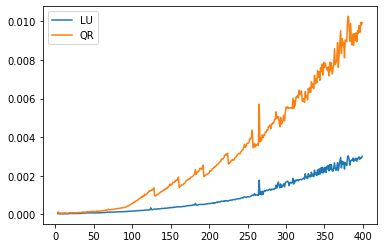

In [158]:
from scipy.sparse.linalg import spsolve
import scipy.sparse.linalg
times1 = []
times2 = []
N = 400
for i in range(3, N):
    avar_t1 = 0.0
    avar_t2 = 0.0
    f = np.ones(i)
    for _ in range(100):
        A = np.random.uniform(-1, 1, size=[i, i])
        start = time.time()
        p, l, u = scipy.linalg.lu(A)
        end = time.time()
        avar_t1 += end - start  
        
        start = time.time()
        q, r = scipy.linalg.qr(A)
        end = time.time()
        avar_t2 += end - start  
        
    avar_t1 /= 100
    avar_t2 /= 100
    times1.append(avar_t1)
    times2.append(avar_t2)
plt.plot(np.array(range(3, N)), times1, label='LU')
plt.plot(np.array(range(3, N)), times2, label='QR')
#plt.yscale('log')
#plt.xscale('log')
plt.legend()

Видно, что QR разложение работает медленнее. Построим график отношения времен работ.

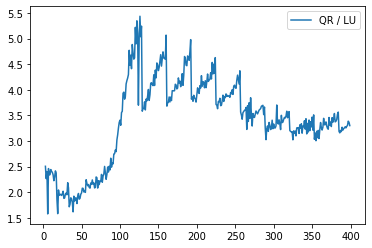

In [160]:
plt.plot(np.array(range(3, N)), np.array(times2) / np.array(times1), label='QR / LU')
plt.legend()

# Задача 5

Реализовать итерационный метод Гаусса решения СЛАУ и метод простой итерации. Использовать данные методы для решения систем различных размеров. Оценить скорость работы методов (необходимое количество операций на одну итерацию) в зависимости от размера системы. 

.

In [3]:
def MPI(A, f, tau, eps, ITER_MAX=int(1e7)):
    A = np.array(A)
    f = np.array(f)
    n = A.shape[0]
    x = np.zeros(n)
    n_iter = 0
    for i in range(ITER_MAX):
        n_iter += 1
        x_old = x
        x = ((np.eye(n) - tau * A) @ x.reshape(n, 1)).reshape(1, n) + tau * f
        if np.linalg.norm(x - x_old) < eps:
            break
    return x, n_iter

In [4]:
A = np.array([
    [0.5, 1],
    [0, 0.5]
])
f = [1, 1]
MPI(A, f, 1, 1e-9)

(array([[-2.,  2.]]), 38)

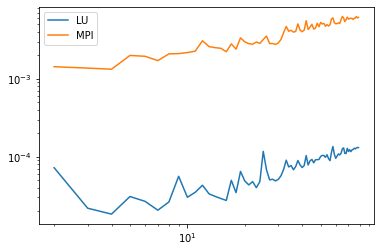

In [5]:
timesLU = []
timesMPI = []
N = 80
for i in range(2, N):
    avar_tLU = 0.0
    avar_tMPI = 0.0
    f = np.ones(i)
    for _ in range(100):
        A = np.diag(np.random.uniform(0.1, 0.9, size=i))
        Q = ortho_group.rvs(i)
        A = Q.T @ A @ Q
        start = time.time()
        x = np.linalg.solve(A, f)
        end = time.time()
        avar_tLU += end - start        
        start = time.time()
        x, iters = MPI(A, f, 1, 1e-9)
        end = time.time()
        avar_tMPI += end - start                
    avar_tLU /= 100
    avar_tMPI /= 100
    timesLU.append(avar_tLU)
    timesMPI.append(avar_tMPI)
plt.plot(np.array(range(2, N)), timesLU, label='LU')
plt.plot(np.array(range(2, N)), timesMPI, label='MPI')
plt.yscale('log')
plt.xscale('log')
plt.legend()

Как видно, написанный на питоне МПИ работает значительно дольше, чем написанный на плюсах LU в numpy. Однако, по графикам видно, что МПИ имеет заметно лучшую асимптотику. Кроме того, как будет видно в задаче 6, МПИ в целом требует большое число итераций.

In [6]:
N = 10
n = 10
N_convergencies = 0
f = np.ones(n)
for i in range(N):
    A = np.random.uniform(-1, 1, size=[n, n])
    A = A.T@A
    lambdas, vect = np.linalg.eig(A)
    l_max = np.max(lambdas)
    tau = np.random.uniform(0.0 + 1e-8, 2 / l_max - 1e-8)
    # tau = 2 / (l_min + l_max)
    l, vect = np.linalg.eig(tau * A - np.eye(n))
    # print(np.max(l))
    x, n_iter = MPI(A, f, tau, 1e-9)
    if n_iter < int(1e7):
        N_convergencies += 1
    print(n_iter)
print("There was " + str(N_convergencies) + " convergencies out of " + str(N))
    
    

23959
5838
22068
1597
19016
73188
54924
6764888
7281
20710
There was 10 convergencies out of 10


# Задача 6

Если использовать метод простых итераций для симметричной положительно определённой матрицы, то верна теорема

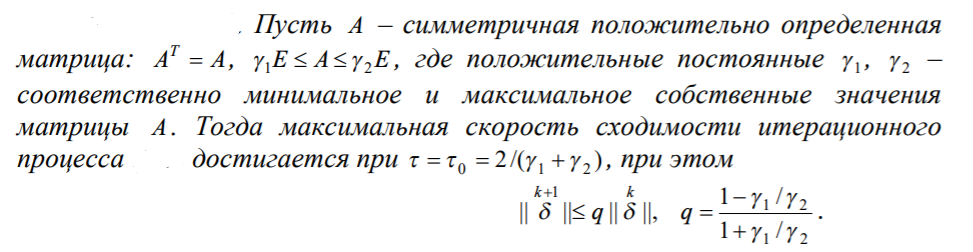  


Ответьте на вопрос - при каких значениях параметра метода простой итерации он сходится? Напишите генератор случайных симметричных положительно определённых матриц и программу, которая проверяет данное утверждение, выбирая несколько значений параметра МПИ, лежащих в том диапазоне, в котором этот метод сходится.

Проверка предусматривает вычисление скорости сходимости итерационного процесса путём сравнения невязок между собой. 



In [7]:
N = 10
n = 10
N_convergencies = 0
f = np.ones(n)
for i in range(N):
    A = np.random.uniform(-1, 1, size=[n, n])
    A = A.T@A
    lambdas, vect = np.linalg.eig(A)
    l_max = np.max(lambdas)
    tau = np.random.uniform(0.0 + 1e-8, 2 / l_max - 1e-8)
    # tau = 2 / (l_min + l_max)
    l, vect = np.linalg.eig(tau * A - np.eye(n))
    # print(np.max(l))
    x, n_iter = MPI(A, f, tau, 1e-9)
    if n_iter < int(1e7):
        N_convergencies += 1
    print(n_iter)
    
print("There was " + str(N_convergencies) + " convergencies out of " + str(N))
    
    

137211
30473
10428
117584
44101
12712
2347
808068
16995
19698
There was 10 convergencies out of 10
